In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
mpl.rcParams.update({'font.size': 22})

In [3]:
using_df = pd.read_csv("../input/서울특별시 공공자전거 대여이력 정보_2017년_1.csv", engine='python')
using_df = using_df.rename(columns={ 
    "대여소번호" : "대여대여소번호",
    "대여대여소명" : "대여대여소",
    "거치대번호" : "대여거치대",
    "반납대여소명" : "반납대여소",
    "반납 거치대번호" : "반납거치대"
})

for i in using_df.columns:
    using_df = using_df.rename(columns={i:"'" + i + "'"})


In [4]:
 
for i in range(1,7):
    temp = pd.read_csv(f"../input/서울특별시 공공자전거 대여이력 정보_2017년_{i+1}.csv", engine='python')
    using_df = pd.concat([using_df,temp], axis=0)


        
# for i in range(0,5):
#     temp = pd.read_csv(f"../input/서울특별시 공공자전거 대여이력 정보_2018년{i+1}.csv", engine='python')
#     using_df = pd.concat([using_df,temp], axis=0)
    
using_df = using_df.reset_index()
del using_df['index']

for i in using_df.columns:
    using_df = using_df.rename(columns={i:i.replace("'","")})
using_df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소,대여거치대,반납일시,반납대여소번호,반납대여소,반납거치대,이용시간(분),이용거리(M)
0,SPB-00230,2017-01-01 0:00,419,홈플러스 앞,5,2017-01-01 0:21,914,새절역 2번출구,18,20,3340
1,SPB-02803,2017-01-01 0:01,825,서빙고동 주민센터 앞,2,2017-01-01 0:15,822,이촌1동 마을공원,7,14,3380
2,SPB-03956,2017-01-01 0:05,906,연신내역 5번출구150M 아래,1,2017-01-01 0:16,931,역촌파출소,6,11,1610
3,SPB-02864,2017-01-01 0:05,906,연신내역 5번출구150M 아래,9,2017-01-01 0:29,912,응암오거리,1,24,3620
4,SPB-01388,2017-01-01 0:05,330,청계천 한빛광장,6,2017-01-01 0:23,171,임광빌딩 앞,9,17,2280


In [5]:
using_df['대여대여소'] = using_df['대여대여소'].apply(lambda x: str(x).replace("'","").strip())
using_df['대여대여소번호'] = using_df['대여대여소번호'].apply(lambda x : str(x).replace("'",""))
# using_df['반납대여소명'] = using_df['반납대여소명'].apply(lambda x: str(x).replace("'","").strip())
using_df['반납여대여소번호'] = using_df['반납대여소번호'].apply(lambda x : str(x).replace("'",""))
using_df['반납대여소'] = using_df['반납대여소'].apply(lambda x : str(x).replace("'","").strip())
using_df['자전거번호'] = using_df['자전거번호'].apply(lambda x: x.replace("'","").strip())
using_df['대여일시'] = using_df['대여일시'].apply(lambda x: x.replace("'",""))
using_df['반납일시'] = using_df['반납일시'].apply(lambda x: x.replace("'",""))
using_df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소,대여거치대,반납일시,반납대여소번호,반납대여소,반납거치대,이용시간(분),이용거리(M),반납여대여소번호
0,SPB-00230,2017-01-01 0:00,419,홈플러스 앞,5,2017-01-01 0:21,914,새절역 2번출구,18,20,3340,914
1,SPB-02803,2017-01-01 0:01,825,서빙고동 주민센터 앞,2,2017-01-01 0:15,822,이촌1동 마을공원,7,14,3380,822
2,SPB-03956,2017-01-01 0:05,906,연신내역 5번출구150M 아래,1,2017-01-01 0:16,931,역촌파출소,6,11,1610,931
3,SPB-02864,2017-01-01 0:05,906,연신내역 5번출구150M 아래,9,2017-01-01 0:29,912,응암오거리,1,24,3620,912
4,SPB-01388,2017-01-01 0:05,330,청계천 한빛광장,6,2017-01-01 0:23,171,임광빌딩 앞,9,17,2280,171


In [6]:
using_df[using_df["대여대여소"].isnull() == False]

,자전거번호,대여일시,대여대여소번호,대여대여소,대여거치대,반납일시,반납대여소번호,반납대여소,반납거치대,이용시간(분),이용거리(M),반납여대여소번호
0,SPB-00230,2017-01-01 0:00,419,홈플러스 앞,5,2017-01-01 0:21,914,새절역 2번출구,18,20,3340,914
1,SPB-02803,2017-01-01 0:01,825,서빙고동 주민센터 앞,2,2017-01-01 0:15,822,이촌1동 마을공원,7,14,3380,822
2,SPB-03956,2017-01-01 0:05,906,연신내역 5번출구150M 아래,1,2017-01-01 0:16,931,역촌파출소,6,11,1610,931
3,SPB-02864,2017-01-01 0:05,906,연신내역 5번출구150M 아래,9,2017-01-01 0:29,912,응암오거리,1,24,3620,912
4,SPB-01388,2017-01-01 0:05,330,청계천 한빛광장,6,2017-01-01 0:23,171,임광빌딩 앞,9,17,2280,171
5,SPB-04437,2017-01-01 0:06,347,동대문역사문화공원역 9번출구 앞,16,2017-01-01 0:18,344,성균관대 E하우스 앞,4,11,1380,344
6,SPB-04461,2017-01-01 0:06,334,종로3가역 2번출구 뒤,9,2017-01-01 0:29,354,포르투갈 대사관 앞,10,22,2430,354
7,SPB-03383,2017-01-01 0:06,175,홍연2교옆,1,2017-01-01 1:07,175,홍연2교옆,1,60,12150,175
8,SPB-04179,2017-01-01 0:06,925,불광역 2번출구,3,2017-01-01 0:16,933,LG서비스 역촌점,6,10,2090,933
9,SPB-01881,2017-01-01 0:07,230,영등포구청역 1번출구,1,2017-01-01 2:42,266,영등포청과시장 사거리,3,155,1680,266


In [7]:
using_df['대여일시'] = pd.to_datetime(using_df["대여일시"])
using_df['반납일시'] = pd.to_datetime(using_df["반납일시"])
using_df['대여날짜'] = using_df["대여일시"].dt.date
using_df['요일'] = using_df["대여일시"].dt.weekday_name
using_df['Weekend'] = using_df["대여일시"].dt.weekday
using_df['대여시간대'] = using_df['대여일시'].dt.hour

In [8]:
using_df.head()
using_df = using_df[(using_df['이용거리(M)'] != 0)]
using_df = using_df[(using_df['이용시간(분)'] != 0)]

In [9]:
using_df.shape

(4835984, 16)

In [10]:
work_df = using_df.set_index('대여일시')

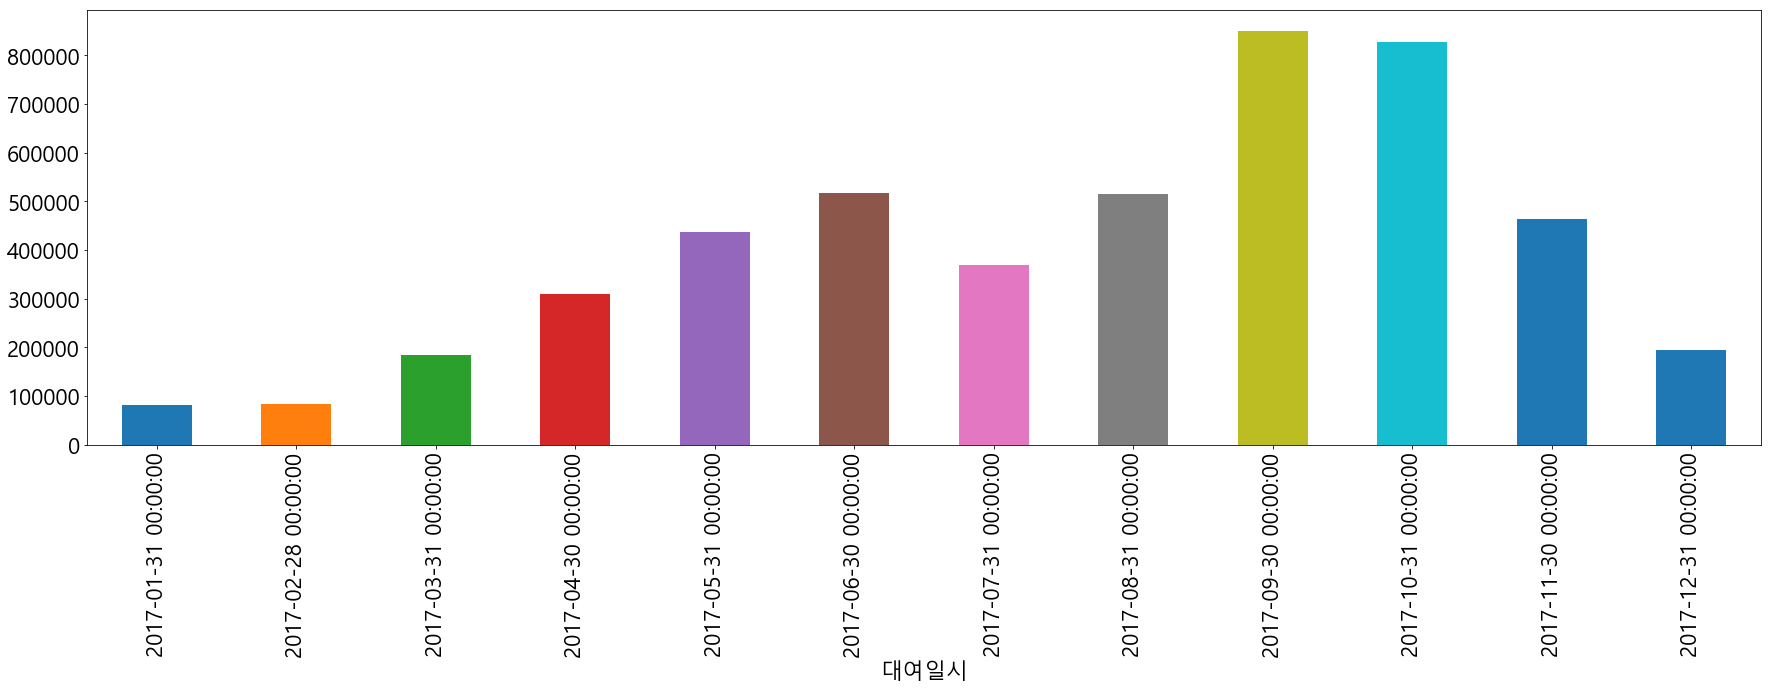

In [11]:
work_df.resample("M").size().plot('bar', figsize=(30,8))

In [12]:
eiyoung = using_df.groupby("대여대여소번호")["대여일시"].count().reset_index()
#이용횟수
eiyoung

,대여대여소번호,대여일시
0,1001,6452
1,1002,2715
2,1003,2582
3,1004,2915
4,1006,3042
5,1007,615
6,1008,4229
7,1009,1232
8,101,4593
9,1010,4406


In [13]:
using_df['날짜'] = using_df['대여일시'].dt.date
nalza = using_df.groupby(["대여대여소번호", "대여대여소", "날짜"])["대여일시"].count().reset_index()
daysofusing = nalza.groupby(["대여대여소번호", "대여대여소"])["날짜"].count().reset_index()
daysofusing = daysofusing.rename(columns={"날짜": "이용일수"})

In [14]:
usagedf = eiyoung.merge(daysofusing, on="대여대여소번호", how='left')
usagedf.head()

,대여대여소번호,대여일시,대여대여소,이용일수
0,1001,6452,광진교 남단 사거리(디지털프라자앞),228
1,1002,2715,해공공원(천호동),234
2,1003,2582,해공도서관앞,248
3,1004,2915,삼성광나루아파트 버스정류장,245
4,1006,3042,롯데캐슬 115동앞,244


In [15]:
usagedf["이용률"] = list(map(lambda x,y : x/y, usagedf["대여일시"], usagedf["이용일수"]))
usagedf.sort_values(by="이용률", ascending=True)

,대여대여소번호,대여일시,대여대여소,이용일수,이용률
338,1652,2,파르코 앞,2,1.000000
673,2363,1,강남 을지병원 교차로,1,1.000000
25,1025,14,상일초등학교,13,1.076923
35,1034,11,고덕동 래미안 힐스테이트,10,1.100000
257,1445,7,용마지구대,6,1.166667
604,2275,5,염곡치안센터 건너편,4,1.250000
39,1038,25,강일 다솜 어린이 공원,20,1.250000
1030,상암센터 정비실,54,상암센터 정비실,43,1.255814
1033,중랑센터,153,중랑센터,119,1.285714
211,1353,25,금호어울림센터힐 내,19,1.315789


In [16]:
gerchi = pd.read_excel("../input/공공자전거 대여소 운영현황(171108) (1).xlsx")
gerchi["대여소번호"] = gerchi["대여소명"].apply(lambda x:str(x).split(".")[0].strip())
gerchi = gerchi.rename(columns={"대여소_구" : "구",
                               "거치대수" : "거치대",
                               "대여소주소": "주소"})

gerchi.head()

,구,대여소명,주소,거치대,위도,경도,대여소번호
0,강남구,2241.양재전화국 사거리,서울특별시 강남구 논현로 201,10.0,37.485378,127.041702,2241
1,강남구,2258.구룡사 삼거리,서울특별시 강남구 논현로2길 22,20.0,37.471539,127.050591,2258
2,강남구,2301. 현대고등학교 건너편,서울특별시 강남구 압구정로 134,10.0,37.524071,127.021790,2301
3,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),서울특별시 강남구 봉은사로 지하 102,10.0,37.505581,127.024277,2302
4,강남구,2303. 논현역 7번출구,서울특별시 강남구 학동로 지하 102,15.0,37.511517,127.021477,2303


In [17]:
gerchi2 = pd.read_excel("../input/공공자전거대여소정보_20180409.xlsx")
gerchi2["거치대"] = gerchi2["거치대"].apply(lambda x: float(x))
gerchi2.head()

,구,대여소번호,대여소명,주소,거치대,위도,경도
0,마포구,101,(구)합정동 주민센터,서울특별시 마포구 동교로8길 58,5.0,37.549561,126.905754
1,마포구,102,망원역 1번출구 앞,서울특별시 마포구 월드컵로 72,20.0,37.556000,126.910454
2,마포구,103,망원역 2번출구 앞,서울특별시 마포구 월드컵로 79,14.0,37.554951,126.910835
3,마포구,104,합정역 1번출구 앞,서울특별시 마포구 양화로 59,13.0,37.550629,126.914986
4,마포구,105,합정역 5번출구 앞,서울특별시 마포구 양화로 48,5.0,37.550007,126.914825


In [18]:
gerchi_all = pd.concat([gerchi, gerchi2[["대여소번호", "대여소명", "구"]]], axis=0)
gerchi_all['대여소번호'] = gerchi_all["대여소번호"].apply(str)
gerchi_all = gerchi_all.drop_duplicates(subset="대여소번호", keep="first")
gerchi_all.head()

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,거치대,경도,구,대여소명,대여소번호,위도,주소
0,10.0,127.041702,강남구,2241.양재전화국 사거리,2241,37.485378,서울특별시 강남구 논현로 201
1,20.0,127.050591,강남구,2258.구룡사 삼거리,2258,37.471539,서울특별시 강남구 논현로2길 22
2,10.0,127.021790,강남구,2301. 현대고등학교 건너편,2301,37.524071,서울특별시 강남구 압구정로 134
3,10.0,127.024277,강남구,2302. 교보타워 버스정류장(신논현역 3번출구 후면),2302,37.505581,서울특별시 강남구 봉은사로 지하 102
4,15.0,127.021477,강남구,2303. 논현역 7번출구,2303,37.511517,서울특별시 강남구 학동로 지하 102


In [19]:
merged_df = usagedf.merge(gerchi_all, left_on="대여대여소번호", right_on="대여소번호", how='left')
merged_df.head()

,대여대여소번호,대여일시,대여대여소,이용일수,이용률,거치대,경도,구,대여소명,대여소번호,위도,주소
0,1001,6452,광진교 남단 사거리(디지털프라자앞),228,28.298246,15.0,127.124718,강동구,1001. 광진교 남단 사거리(디지털프라자앞),1001,37.541805,서울특별시 강동구 구천면로 171
1,1002,2715,해공공원(천호동),234,11.602564,10.0,127.125916,강동구,1002. 해공공원(천호동),1002,37.545219,서울특별시 강동구 올림픽로 702
2,1003,2582,해공도서관앞,248,10.411290,20.0,127.125458,강동구,1003. 해공도서관앞,1003,37.543915,서울특별시 강동구 올림픽로 702
3,1004,2915,삼성광나루아파트 버스정류장,245,11.897959,10.0,127.128860,강동구,1004. 삼성광나루아파트 버스정류장,1004,37.553349,서울특별시 강동구 상암로3길 77
4,1006,3042,롯데캐슬 115동앞,244,12.467213,15.0,127.142799,강동구,1006. 롯데캐슬 115동앞,1006,37.554920,서울특별시 강동구 양재대로 1665


In [20]:
merged_df.sort_values(by="이용률", ascending=False)

,대여대여소번호,대여일시,대여대여소,이용일수,이용률,거치대,경도,구,대여소명,대여소번호,위도,주소
494,207,52570,여의나루역 1번출구 앞,364,144.423077,40.0,126.932098,영등포구,207. 여의나루역 1번출구 앞,207,37.526989,서울특별시 영등포구 여의동로 지하343
80,113,40819,홍대입구역 2번출구 앞,364,112.140110,25.0,126.923805,마포구,113. 홍대입구역 2번출구 앞,113,37.557499,서울특별시 마포구 양화로 165
839,502,37414,뚝섬유원지역 1번출구 앞,364,102.785714,15.0,127.067192,광진구,502. 뚝섬유원지역 1번출구 앞,502,37.531860,서울특별시 광진구 능동로 10
110,1210,14448,롯데월드타워(잠실역2번출구 쪽),158,91.443038,30.0,127.100960,송파구,1210. 롯데월드타워(잠실역2번출구 쪽),1210,37.513126,서울특별시 송파구 올림픽로 293-19
497,2102,15871,봉림교 교통섬,205,77.419512,20.0,126.926392,관악구,2102. 봉림교 교통섬,2102,37.484230,서울특별시 관악구 관천로 52
555,2219,13861,"고속터미널역 8-1번, 8-2번 출구 사이",199,69.653266,20.0,127.003944,서초구,"2219. 고속터미널역 8-1번, 8-2번 출구 사이",2219,37.506199,서울특별시 서초구 신반포로 지하 188
415,1906,14746,신도림역 1번 출구 앞,214,68.906542,20.0,126.890099,구로구,1906. 신도림역 1번 출구 앞,1906,37.509720,서울특별시 구로구 경인로 688
281,152,24544,마포구민체육센터 앞,364,67.428571,30.0,126.898018,마포구,152. 마포구민체육센터 앞,152,37.556610,서울특별시 마포구 망원동 452-4
173,1308,11535,안암로터리 버스정류장 앞,193,59.766839,10.0,127.028976,성북구,1308. 안암로터리 버스정류장 앞,1308,37.582592,서울특별시 성북구 안암로 69
47,106,21652,합정역 7번출구 앞,364,59.483516,10.0,126.912827,마포구,106. 합정역 7번출구 앞,106,37.548645,서울특별시 마포구 독막로 4


In [21]:
usagedf.head()

,대여대여소번호,대여일시,대여대여소,이용일수,이용률
0,1001,6452,광진교 남단 사거리(디지털프라자앞),228,28.298246
1,1002,2715,해공공원(천호동),234,11.602564
2,1003,2582,해공도서관앞,248,10.411290
3,1004,2915,삼성광나루아파트 버스정류장,245,11.897959
4,1006,3042,롯데캐슬 115동앞,244,12.467213


In [22]:
gu_df = usagedf.merge(gerchi_all[["구", "대여소번호"]], left_on="대여대여소번호", right_on="대여소번호" ,how='left')
gu_df.head()

,대여대여소번호,대여일시,대여대여소,이용일수,이용률,구,대여소번호
0,1001,6452,광진교 남단 사거리(디지털프라자앞),228,28.298246,강동구,1001
1,1002,2715,해공공원(천호동),234,11.602564,강동구,1002
2,1003,2582,해공도서관앞,248,10.411290,강동구,1003
3,1004,2915,삼성광나루아파트 버스정류장,245,11.897959,강동구,1004
4,1006,3042,롯데캐슬 115동앞,244,12.467213,강동구,1006


In [23]:
sumbygu = gu_df.groupby("구")["대여일시","이용일수"].sum().reset_index()
sumbygu['이용률'] = list(map(lambda x,y : x/y, sumbygu['대여일시'], sumbygu['이용일수']))
sumbygu.sort_values(by="이용률").to_excel("구별 이용률.xlsx")

In [24]:
gu_df.head()

,대여대여소번호,대여일시,대여대여소,이용일수,이용률,구,대여소번호
0,1001,6452,광진교 남단 사거리(디지털프라자앞),228,28.298246,강동구,1001
1,1002,2715,해공공원(천호동),234,11.602564,강동구,1002
2,1003,2582,해공도서관앞,248,10.411290,강동구,1003
3,1004,2915,삼성광나루아파트 버스정류장,245,11.897959,강동구,1004
4,1006,3042,롯데캐슬 115동앞,244,12.467213,강동구,1006


In [25]:
max_gu = gu_df.groupby("구")["대여대여소번호", "이용률"].max().rename(columns={"이용률" : "최대이용률"})
min_gu = gu_df.groupby("구")["대여대여소번호", "이용률"].min().rename(columns={"이용률" : "최소이용률"})

In [26]:
minmax_gu = pd.concat([max_gu, min_gu], axis=1)
minmax_gu["이용률차이"] = list(map(lambda x, y : x -y, minmax_gu["최대이용률"], minmax_gu["최소이용률"]))

In [27]:
work_df.head()

,자전거번호,대여대여소번호,대여대여소,대여거치대,반납일시,반납대여소번호,반납대여소,반납거치대,이용시간(분),이용거리(M),반납여대여소번호,대여날짜,요일,Weekend,대여시간대
대여일시,,,,,,,,,,,,,,,
2017-01-01 00:00:00,SPB-00230,419,홈플러스 앞,5,2017-01-01 00:21:00,914,새절역 2번출구,18,20,3340,914,2017-01-01,Sunday,6,0
2017-01-01 00:01:00,SPB-02803,825,서빙고동 주민센터 앞,2,2017-01-01 00:15:00,822,이촌1동 마을공원,7,14,3380,822,2017-01-01,Sunday,6,0
2017-01-01 00:05:00,SPB-03956,906,연신내역 5번출구150M 아래,1,2017-01-01 00:16:00,931,역촌파출소,6,11,1610,931,2017-01-01,Sunday,6,0
2017-01-01 00:05:00,SPB-02864,906,연신내역 5번출구150M 아래,9,2017-01-01 00:29:00,912,응암오거리,1,24,3620,912,2017-01-01,Sunday,6,0
2017-01-01 00:05:00,SPB-01388,330,청계천 한빛광장,6,2017-01-01 00:23:00,171,임광빌딩 앞,9,17,2280,171,2017-01-01,Sunday,6,0


In [28]:
all_in_one = work_df.resample("d").count()

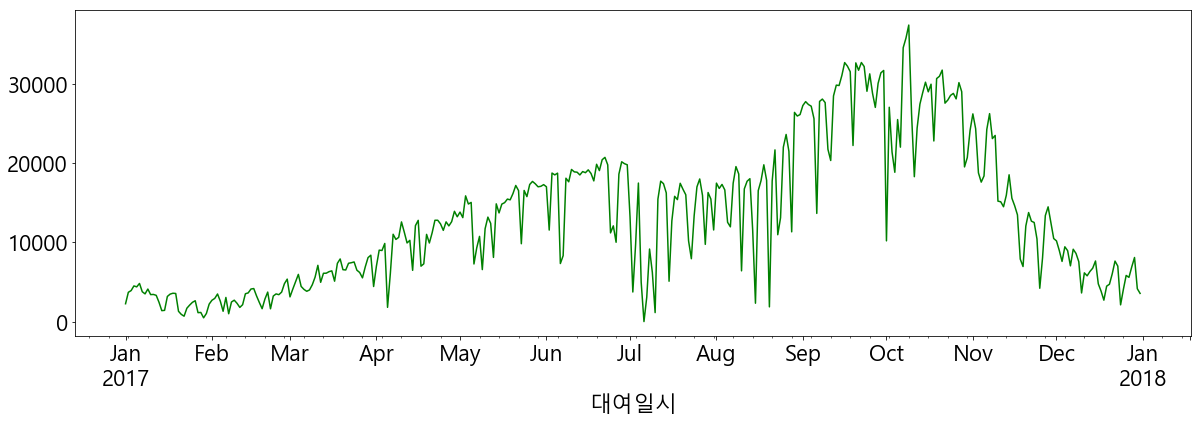

In [29]:
all_in_one["자전거번호"].plot(kind="line", figsize=(20,6), color="green")

In [30]:
all_in_one["대여대여소번호"].agg(["mean","median", "std", "max", "min", "sum"]).apply(int)

mean        13249
median      12107
std          8924
max         37411
min             7
sum       4835984
Name: 대여대여소번호, dtype: int64

In [31]:
daeyeor = work_df.resample("D")["대여대여소번호"]

In [32]:
weather = pd.read_csv("../input/기상개황_20181031161006.csv", engine='python',skiprows=1)

In [33]:
daeyeor = work_df.resample("M")["대여대여소번호"].count().reset_index()
daeyeor

,대여일시,대여대여소번호
0,2017-01-31,81912
1,2017-02-28,83358
2,2017-03-31,183526
3,2017-04-30,310394
4,2017-05-31,436948
5,2017-06-30,516264
6,2017-07-31,370132
7,2017-08-31,515224
8,2017-09-30,850656
9,2017-10-31,827676


In [34]:
day_count = pd.concat([daeyeor, weather], axis=1)
index = day_count.set_index('대여일시').drop("월별(1)", axis=1)

In [35]:
index

,대여대여소번호,평균기온 (℃)
대여일시,,
2017-01-31,81912,0.6
2017-02-28,83358,4.1
2017-03-31,183526,8.9
2017-04-30,310394,14.7
2017-05-31,436948,19.4
2017-06-30,516264,22.5
2017-07-31,370132,26.3
2017-08-31,515224,27.3
2017-09-30,850656,22.2


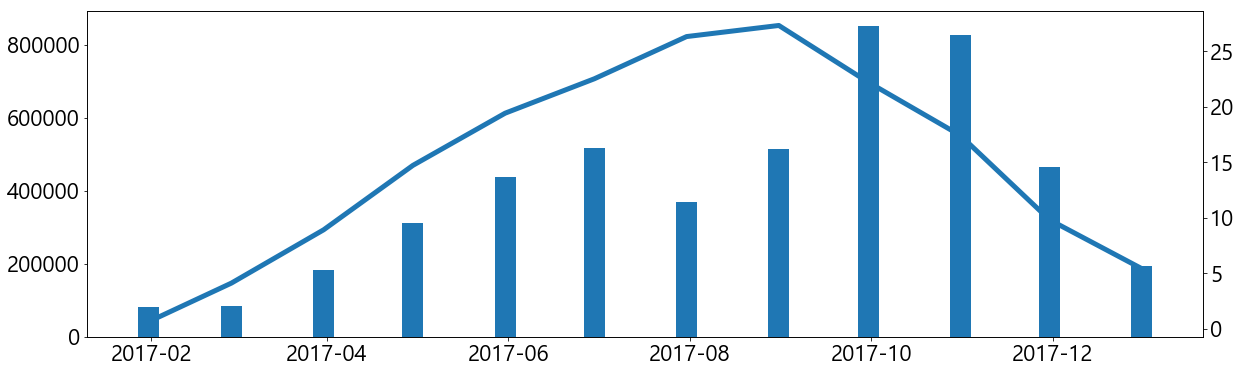

In [36]:
plt.figure(figsize=(20, 6))
plt.rcParams['lines.linewidth'] = 5

plt.bar(index.index, index["대여대여소번호"], 7)
plt.twinx()
plt.plot(index.index, index["평균기온 (℃)"])
plt.show()

In [37]:
def weekendfinder(number):
    if number < 5:
        return "weekday"
    else:
        return "weekend" 
work_df["주말"] = list(map(weekendfinder, work_df["Weekend"]))

In [38]:
work_df.head()

,자전거번호,대여대여소번호,대여대여소,대여거치대,반납일시,반납대여소번호,반납대여소,반납거치대,이용시간(분),이용거리(M),반납여대여소번호,대여날짜,요일,Weekend,대여시간대,주말
대여일시,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,SPB-00230,419,홈플러스 앞,5,2017-01-01 00:21:00,914,새절역 2번출구,18,20,3340,914,2017-01-01,Sunday,6,0,weekend
2017-01-01 00:01:00,SPB-02803,825,서빙고동 주민센터 앞,2,2017-01-01 00:15:00,822,이촌1동 마을공원,7,14,3380,822,2017-01-01,Sunday,6,0,weekend
2017-01-01 00:05:00,SPB-03956,906,연신내역 5번출구150M 아래,1,2017-01-01 00:16:00,931,역촌파출소,6,11,1610,931,2017-01-01,Sunday,6,0,weekend
2017-01-01 00:05:00,SPB-02864,906,연신내역 5번출구150M 아래,9,2017-01-01 00:29:00,912,응암오거리,1,24,3620,912,2017-01-01,Sunday,6,0,weekend
2017-01-01 00:05:00,SPB-01388,330,청계천 한빛광장,6,2017-01-01 00:23:00,171,임광빌딩 앞,9,17,2280,171,2017-01-01,Sunday,6,0,weekend


In [39]:
weekusage = work_df.groupby(["주말","대여대여소", "대여대여소번호"])["반납일시"].count().reset_index()
weekusage = weekusage.rename(columns={"반납일시": "사용횟수"})
weekusage.head()

,주말,대여대여소,대여대여소번호,사용횟수
0,weekday,,중랑정비팀test 1005,86
1,weekday,(구)신한은행 중랑교지점,1442,48
2,weekday,(구)합정동 주민센터,101,3431
3,weekday,3호선 매봉역 3번출구앞,2335,2165
4,weekday,4동 주민센터 대여소,1635,458


In [40]:
merged_weekusage = weekusage.merge(gerchi_all, left_on="대여대여소번호", right_on="대여소번호", how='left')
merged_weekusage.head()

,주말,대여대여소,대여대여소번호,사용횟수,거치대,경도,구,대여소명,대여소번호,위도,주소
0,weekday,,중랑정비팀test 1005,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,weekday,(구)신한은행 중랑교지점,1442,48,NaN,NaN,중랑구,(구)신한은행 중랑교지점,1442,NaN,NaN
2,weekday,(구)합정동 주민센터,101,3431,5.0,126.905754,마포구,101. (구)합정동 주민센터,101,37.549561,서울특별시 마포구 동교로8길 58
3,weekday,3호선 매봉역 3번출구앞,2335,2165,10.0,127.046761,강남구,2335. 3호선 매봉역 3번출구앞,2335,37.486767,서울특별시 강남구 남부순환로 2748
4,weekday,4동 주민센터 대여소,1635,458,11.0,127.083160,노원구,1635. 상계3.4동 주민센터 대여소,1635,37.672710,서울특별시 노원구 덕릉로131길 8


In [41]:
weekusage[weekusage["주말"] == "weekday"].sort_values("사용횟수", ascending=False)
weekusage[weekusage["주말"] == "weekend"].sort_values("사용횟수", ascending=False)

,주말,대여대여소,대여대여소번호,사용횟수
1751,weekend,여의나루역 1번출구 앞,207,18184
1342,weekend,뚝섬유원지역 1번출구 앞,502,15092
2044,weekend,홍대입구역 2번출구 앞,113,11588
1368,weekend,마포구민체육센터 앞,152,9363
1825,weekend,월드컵공원,186,8121
1574,weekend,서울숲역 4번 출구 옆,511,7876
2026,weekend,합정역 7번출구 앞,106,7278
2043,weekend,홈플러스 앞,419,6692
1161,weekend,광진구의회 앞,501,6335
1042,weekend,CJ 드림시티,907,6248


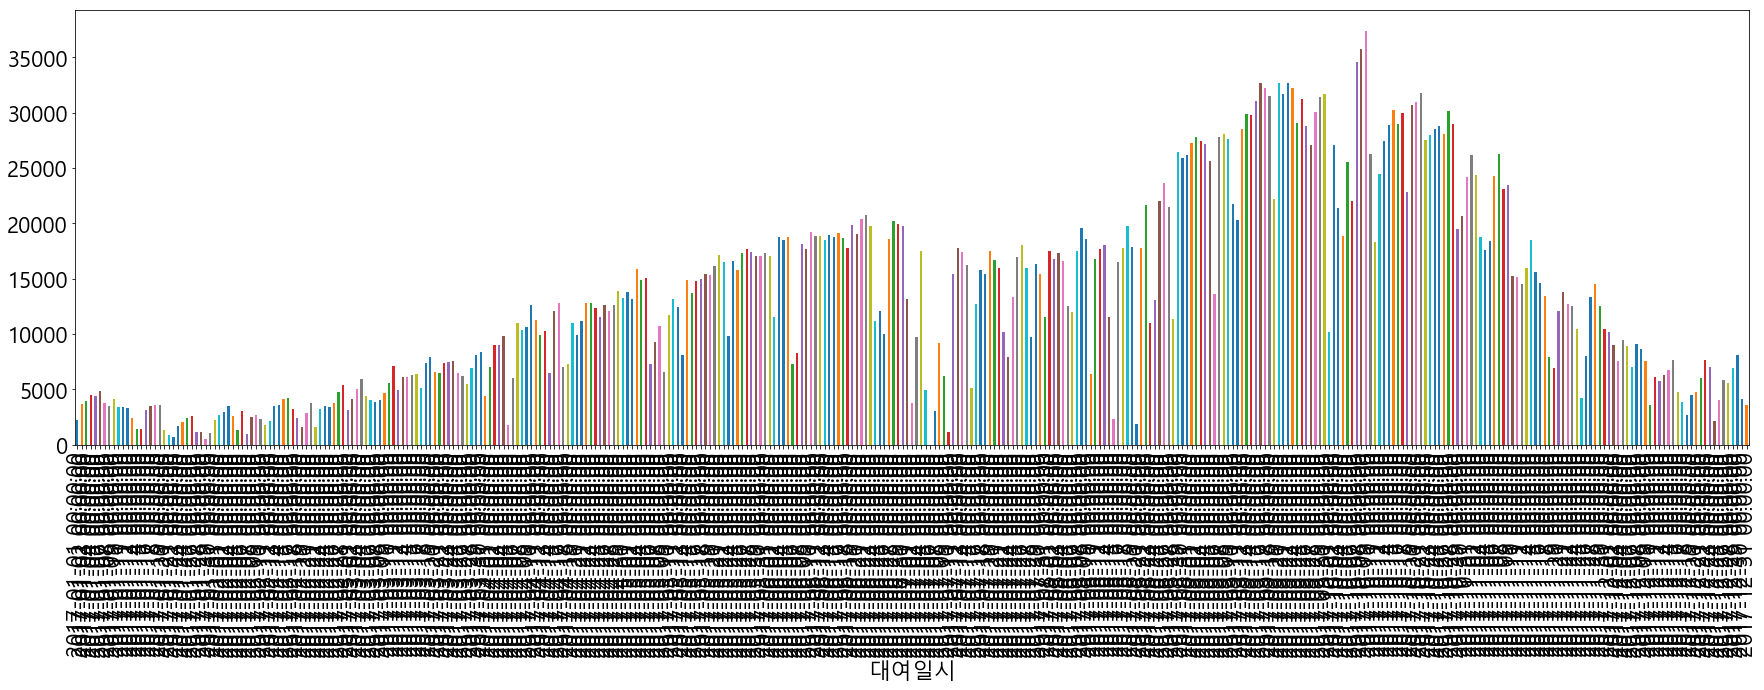

In [42]:
work_df.resample("d").size().plot('bar', figsize=(30,8))

In [43]:
def findweekend(number):
    if number < 5:
        return 'Weekday'
    else:
        return 'Weekend'
    
work_df['주말'] = list(map(findweekend, work_df['Weekend']))

In [44]:
work_df['대여대여소번호'] = work_df['대여대여소번호'].apply(lambda x : str(x).replace("'",""))
work_df['반납대여소번호'] = work_df['반납대여소번호'].apply(lambda x : str(x).replace("'",""))


In [45]:
borrowbike = work_df.groupby(["주말","대여대여소번호","대여대여소"])["대여거치대"].count().reset_index()
returnbike = work_df.groupby(["주말","반납대여소번호","반납대여소"])["반납거치대"].count().reset_index()

In [46]:
borrowbike['ID'] = list(map(lambda x,y : x+"-"+y, borrowbike['주말'], borrowbike['대여대여소번호']))
returnbike['ID'] = list(map(lambda x,y : x+"-"+y, returnbike['주말'], returnbike['반납대여소번호']))

In [47]:
totalborrow = borrowbike.merge(returnbike, on="ID", how='left')
totalborrow = totalborrow.rename(columns={"대여거치대" : "대여수",
                           "반납거치대" : "반납수"})
totalborrow = totalborrow.drop(columns = ["주말_y", "반납대여소", "반납대여소번호"])

In [48]:
totalborrow["차이"] = list(map(lambda x,y : x -y, totalborrow["대여수"], totalborrow["반납수"]))
totalborrow["절대차이"] = list(map(lambda x,y : abs(x -y), totalborrow["대여수"], totalborrow["반납수"]))
totalborrow.head()

,주말_x,대여대여소번호,대여대여소,대여수,ID,반납수,차이,절대차이
0,Weekday,1001,광진교 남단 사거리(디지털프라자앞),4285,Weekday-1001,4391,-106,106
1,Weekday,1002,해공공원(천호동),1850,Weekday-1002,2226,-376,376
2,Weekday,1003,해공도서관앞,1792,Weekday-1003,1879,-87,87
3,Weekday,1004,삼성광나루아파트 버스정류장,1930,Weekday-1004,2982,-1052,1052
4,Weekday,1006,롯데캐슬 115동앞,2085,Weekday-1006,1852,233,233


In [49]:
totalborrow[totalborrow['주말_x'] == 'Weekday'].sort_values("절대차이").to_excel("주중대여반납차이.xlsx")
totalborrow[totalborrow['주말_x'] == 'Weekend'].sort_values("절대차이").to_excel("주말대여반납차이.xlsx")

In [50]:
work_df.shape

(4835984, 16)

In [51]:
nottoreturn = work_df[work_df["대여대여소번호"] != work_df["반납대여소번호"]]
nottoreturn.shape

(4246148, 16)

In [52]:
nottoreturn_borrowbike = nottoreturn.groupby(["주말","대여대여소번호","대여대여소"])["대여거치대"].count().reset_index()
nottoreturn_returnbike = nottoreturn.groupby(["주말","반납대여소번호","반납대여소"])["반납거치대"].count().reset_index()
nottoreturn_borrowbike['ID'] = list(map(lambda x,y : x+"-"+y, nottoreturn_borrowbike['주말'], nottoreturn_borrowbike['대여대여소번호']))
nottoreturn_returnbike['ID'] = list(map(lambda x,y : x+"-"+y, nottoreturn_returnbike['주말'], nottoreturn_returnbike['반납대여소번호']))
nottoretunrn_totalborrow = nottoreturn_borrowbike.merge(nottoreturn_returnbike, on="ID", how='left')
nottoretunrn_totalborrow = nottoretunrn_totalborrow.rename(columns={"대여거치대" : "대여수",
                           "반납거치대" : "반납수"})
nottoretunrn_totalborrow = nottoretunrn_totalborrow.drop(columns = ["주말_y", "반납대여소", "반납대여소번호"])
nottoretunrn_totalborrow["차이"] = list(map(lambda x,y : x -y, nottoretunrn_totalborrow["대여수"], nottoretunrn_totalborrow["반납수"]))
nottoretunrn_totalborrow["절대차이"] = list(map(lambda x,y : abs(x -y), nottoretunrn_totalborrow["대여수"], nottoretunrn_totalborrow["반납수"]))

In [53]:
nottoretunrn_totalborrow.head()

,주말_x,대여대여소번호,대여대여소,대여수,ID,반납수,차이,절대차이
0,Weekday,1001,광진교 남단 사거리(디지털프라자앞),3760,Weekday-1001,3866,-106,106
1,Weekday,1002,해공공원(천호동),1496,Weekday-1002,1872,-376,376
2,Weekday,1003,해공도서관앞,1473,Weekday-1003,1560,-87,87
3,Weekday,1004,삼성광나루아파트 버스정류장,1446,Weekday-1004,2498,-1052,1052
4,Weekday,1006,롯데캐슬 115동앞,1693,Weekday-1006,1460,233,233


In [54]:
nottoretunrn_totalborrow = nottoretunrn_totalborrow.merge(usagedf[["대여대여소번호","이용률"]],how='left')

In [55]:
nottoretunrn_totalborrow[nottoretunrn_totalborrow['주말_x'] == 'Weekday'].sort_values("절대차이", ascending=0).to_excel("주중대여반납차이(회귀제거).xlsx")
nottoretunrn_totalborrow[nottoretunrn_totalborrow['주말_x'] == 'Weekend'].sort_values("절대차이", ascending=0).to_excel("주말대여반납차이(회귀제거).xlsx")

In [194]:
nottoreturn[nottoreturn["대여대여소번호"] =="907"].groupby("반납대여소")["반납대여소번호"].count().reset_index().sort_values("반납대여소번호", ascending=0).head(10)

,반납대여소,반납대여소번호
174,연신내역 5번출구150M 아래,1109
120,새절역 2번출구,840
200,은평평화공원(역촌역4번출구),835
191,월드컵경기장역 3번출구 옆,737
207,이마트 은평점,703
224,증산2교,646
167,역촌파출소,570
69,마포구민체육센터 앞,516
203,응암1동사무소,497
247,홈플러스 앞,478


In [ ]:
nottoreturn[nottoreturn["반납대여소번호"] == "907"].groupby("대여대여소")["대여대여소번호"].count().reset_index().sort_values(by="대여대여소번호", ascending=0).head(10)

In [196]:
nottoreturn[nottoreturn["반납대여소번호"] == "419"].groupby("대여대여소")["대여대여소번호"].count().reset_index().sort_values(by="대여대여소번호", ascending=0).head(10)

,대여대여소,대여대여소번호
87,마포구청 앞,779
150,새절역 2번출구,698
169,서울시 공공자전거 상암센터,594
231,월드컵경기장역 3번출구 옆,545
1,CJ 드림시티,478
144,상암월드컵파크 3단지 후문,451
143,상암월드컵파크 1단지 교차로,446
232,월드컵공원,433
3,DMC산학협력연구센터 앞,378
88,마포구청역,368


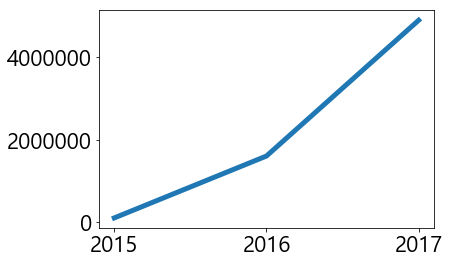

In [63]:
a=['2015','2016','2017']
b=[110000,1610000,4900000]
plt.figsize = (10,10)
plt.plot(a,b)

In [175]:
numberofdaeytour = "907"
bongwon = work_df[(work_df["대여대여소번호"] == numberofdaeytour) | (work_df["반납대여소번호"] == numberofdaeytour)]
bongwon = bongwon[bongwon["대여대여소번호"] != bongwon["반납대여소번호"]]

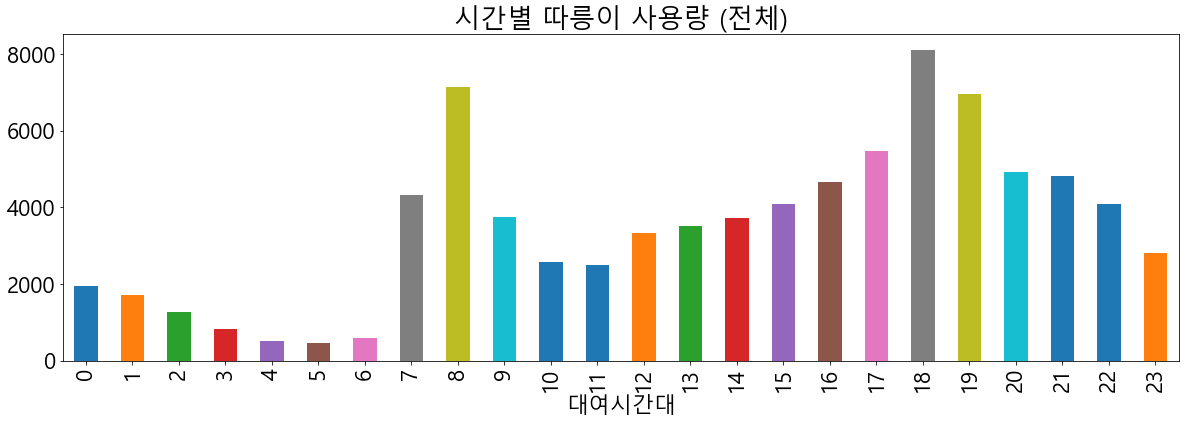

In [176]:
bongwon.groupby('대여시간대')["대여대여소번호"].count().plot(kind="bar", figsize=(20,6),title ="시간별 따릉이 사용량 (전체)")

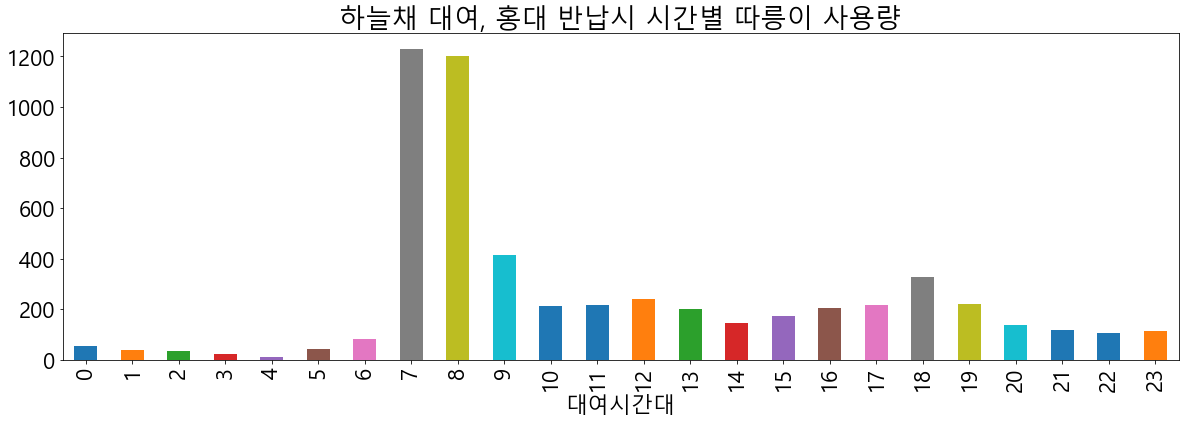

In [183]:
bongwon[(bongwon["반납대여소번호"] == numberofdaeytour ) & (bongwon["대여대여소번호"] == '183' ) ].groupby('대여시간대')["대여대여소번호"].count().plot(kind="bar", figsize=(20,6),title ="하늘채 대여, 홍대 반납시 시간별 따릉이 사용량")

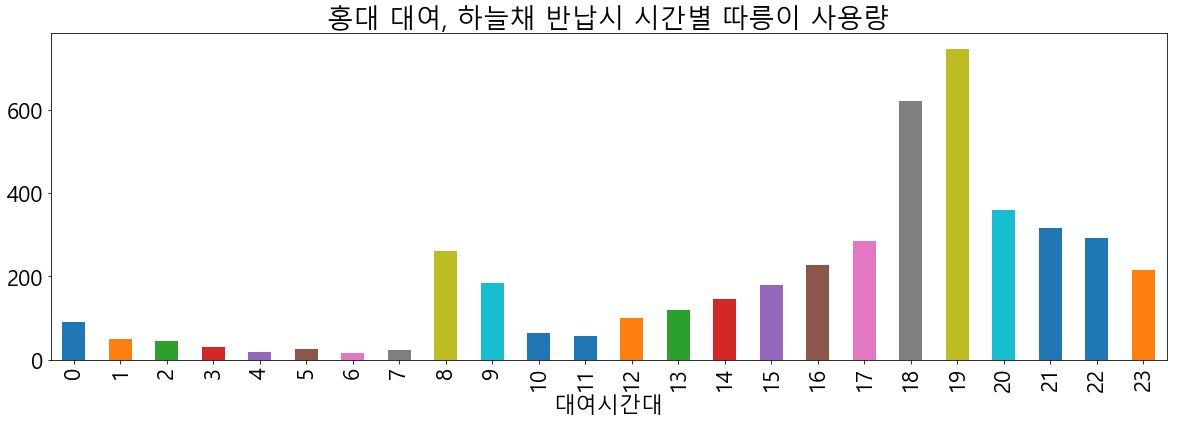

In [184]:
bongwon[(bongwon["대여대여소번호"] == numberofdaeytour ) & (bongwon["반납대여소번호"] == '183' ) ].groupby('대여시간대')["대여대여소번호"].count().plot(kind="bar", figsize=(20,6),title ="홍대 대여, 하늘채 반납시 시간별 따릉이 사용량")

In [193]:
bongwon[(bongwon["대여대여소번호"] == '183' ) & (bongwon["반납대여소번호"] == numberofdaeytour ) ]['이용시간(분)'].mean()

8.784845324991311

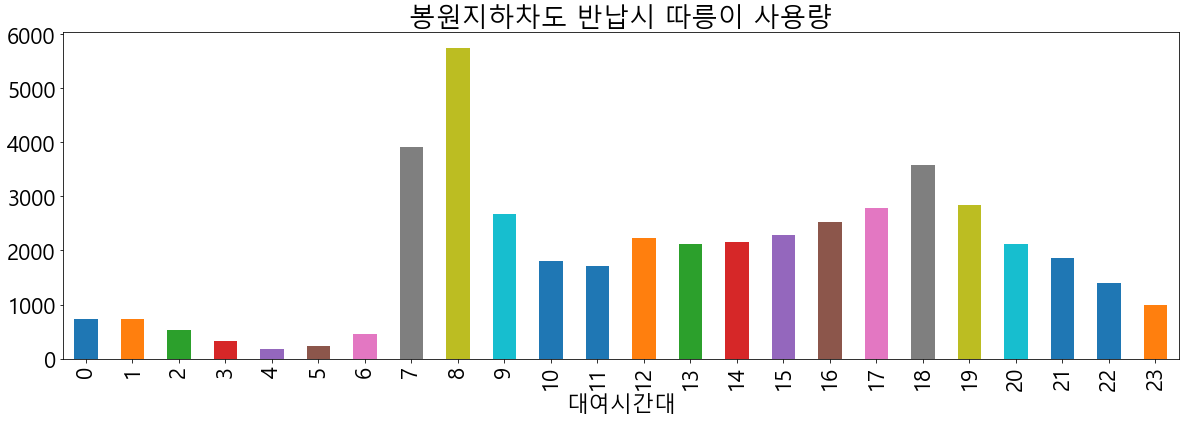

In [187]:
bongwon[bongwon["반납대여소번호"] == numberofdaeytour].groupby('대여시간대')["대여대여소번호"].count().plot(kind="bar", figsize=(20,6),title ="봉원지하차도 반납시 따릉이 사용량")

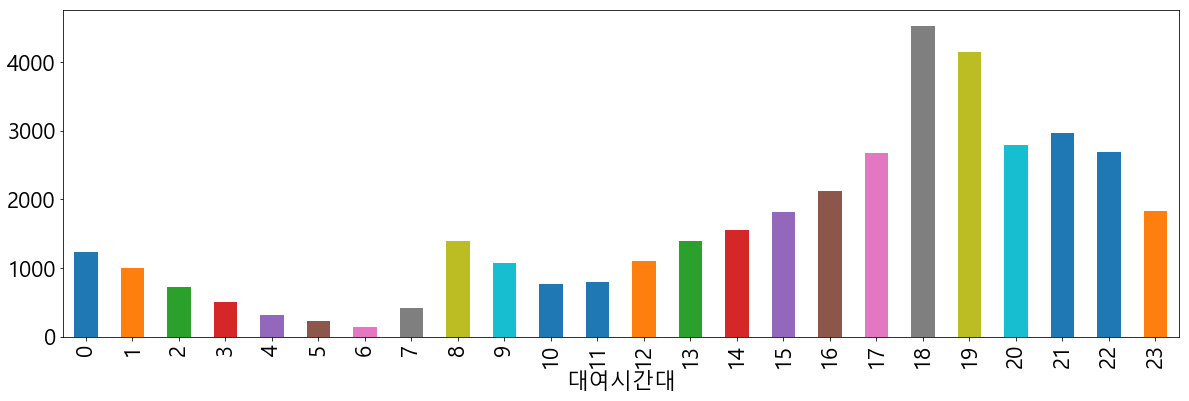

In [188]:
fromhongdae = bongwon[(bongwon["대여대여소번호"] == numberofdaeytour)].groupby('대여시간대')["대여대여소번호"].count()
fromhongdae = fromhongdae.rename(columns={'대여시간대' : '홍대에서 하늘채입구로'})
fromhongdae.plot(kind="bar", figsize=(20,6))

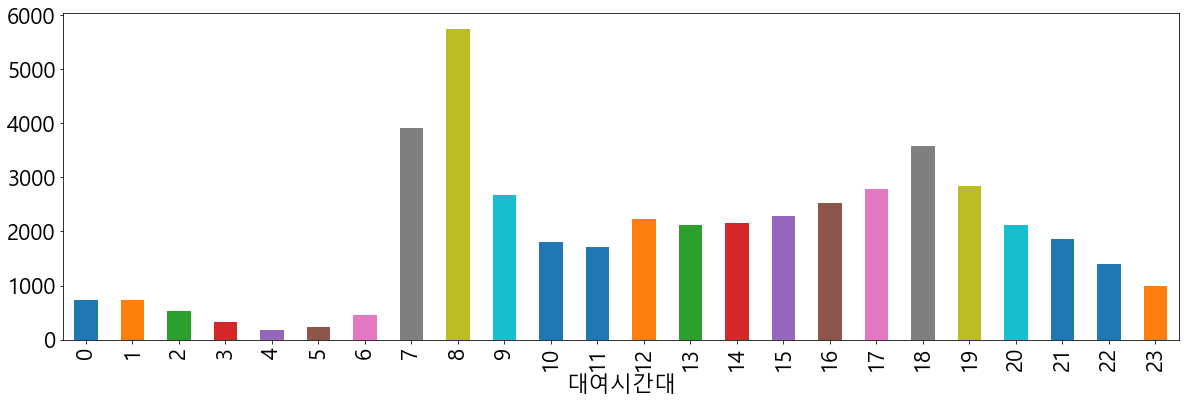

In [189]:
tohongdae = bongwon[(bongwon["반납대여소번호"] == numberofdaeytour)].groupby('대여시간대')["반납대여소번호"].count()
tohongdae.plot(kind="bar", figsize=(20,6))

In [190]:
both= pd.concat([fromhongdae, tohongdae], axis=1)
both = both.rename(columns={0 : "대여시", "반납대여소번호" : "반납시"})

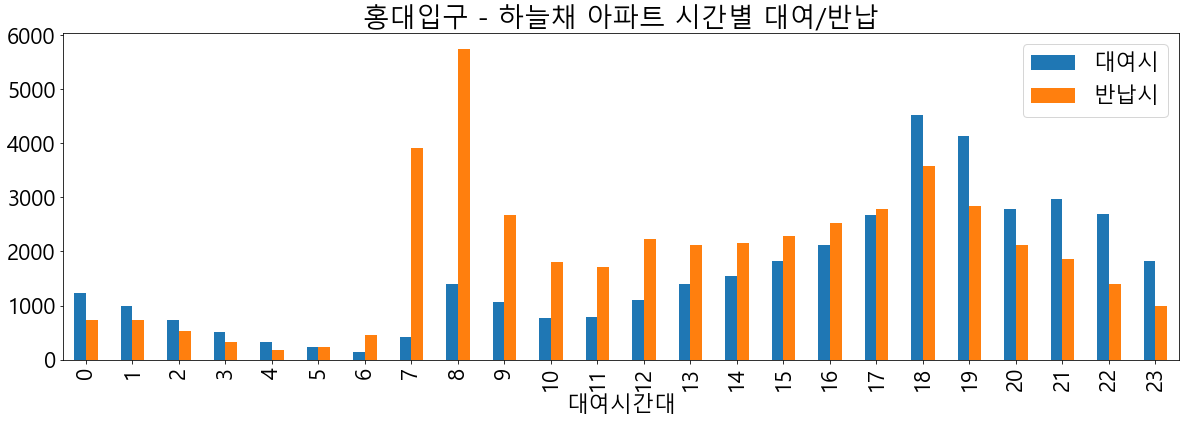

In [192]:
both.plot(kind="bar", figsize=(20,6), title="홍대입구 - 하늘채 아파트 시간별 대여/반납")

In [ ]:
nottoretunrn_totalborrow[nottoretunrn_totalborrow['주말_x'] == 'Weekday'].sort_values("절대차이", ascending=0).to_excel("주중대여반납차이(회귀제거).xlsx")
nottoretunrn_totalborrow[nottoretunrn_totalborrow['주말_x'] == 'Weekend'].sort_values("절대차이", ascending=0).to_excel("주말대여반납차이(회귀제거).xlsx")

In [87]:
work_df.head()

,자전거번호,대여대여소번호,대여대여소,대여거치대,반납일시,반납대여소번호,반납대여소,반납거치대,이용시간(분),이용거리(M),반납여대여소번호,대여날짜,요일,Weekend,대여시간대,주말
대여일시,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,SPB-00230,419,홈플러스 앞,5,2017-01-01 00:21:00,914,새절역 2번출구,18,20,3340,914,2017-01-01,Sunday,6,0,Weekend
2017-01-01 00:01:00,SPB-02803,825,서빙고동 주민센터 앞,2,2017-01-01 00:15:00,822,이촌1동 마을공원,7,14,3380,822,2017-01-01,Sunday,6,0,Weekend
2017-01-01 00:05:00,SPB-03956,906,연신내역 5번출구150M 아래,1,2017-01-01 00:16:00,931,역촌파출소,6,11,1610,931,2017-01-01,Sunday,6,0,Weekend
2017-01-01 00:05:00,SPB-02864,906,연신내역 5번출구150M 아래,9,2017-01-01 00:29:00,912,응암오거리,1,24,3620,912,2017-01-01,Sunday,6,0,Weekend
2017-01-01 00:05:00,SPB-01388,330,청계천 한빛광장,6,2017-01-01 00:23:00,171,임광빌딩 앞,9,17,2280,171,2017-01-01,Sunday,6,0,Weekend


In [119]:
notcomeback_df = work_df[work_df["대여대여소번호"] != work_df["반납대여소번호"]]
mile_borrow = notcomeback_df.groupby(['주말','대여대여소번호'])['이용시간(분)'].mean().reset_index()
mile_return = notcomeback_df.groupby(['주말','반납대여소번호'])['이용시간(분)'].mean().reset_index()

mile_borrow['ID'] = list(map(lambda x,y : x+"-"+y, mile_borrow['주말'], mile_borrow['대여대여소번호']))
mile_return['ID'] = list(map(lambda x,y : x+"-"+y, mile_return['주말'], mile_return['반납대여소번호']))
mile_total = mile_borrow.merge(mile_return, on="ID", how='left')
mile_total = mile_total.rename(columns={"이용시간(분)_x" : "대여 평균시간",
                           "이용시간(분)_y" : "반납 평균시간"})
mile_total['총 평균시간'] = list(map(lambda x,y : (x+y) / 2 , mile_total["대여 평균시간"], mile_total["반납 평균시간"]))
mile_total.head()

,주말_x,대여대여소번호,대여 평균시간,ID,주말_y,반납대여소번호,반납 평균시간,총 평균시간
0,Weekday,1001,27.321809,Weekday-1001,Weekday,1001,29.423952,28.372880
1,Weekday,1002,30.078209,Weekday-1002,Weekday,1002,35.772970,32.925589
2,Weekday,1003,27.890020,Weekday-1003,Weekday,1003,27.314103,27.602061
3,Weekday,1004,27.439834,Weekday-1004,Weekday,1004,28.698559,28.069196
4,Weekday,1006,27.918488,Weekday-1006,Weekday,1006,34.782192,31.350340


In [120]:
total_info = nottoretunrn_totalborrow.merge(mile_total[["ID", "대여 평균시간", "반납 평균시간", "총 평균시간"]], on="ID", how="left")

In [121]:
total_info["총 평균시간"].describe()

count    2066.000000
mean       27.076372
std         8.386987
min         7.358974
25%        21.052534
50%        26.092043
75%        31.680190
max        81.000000
Name: 총 평균시간, dtype: float64

In [108]:
total_info[total_info['주말_x'] == 'Weekday'].sort_values("절대차이", ascending=0).to_excel("주중대여반납차이.xlsx")
total_info[total_info['주말_x'] == 'Weekend'].sort_values("절대차이", ascending=0).to_excel("주말대여반납차이.xlsx")